# Unsupervised Learning –Clustering
    1) K-means, K-means++
    2) Hierarchical Method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def plot_scatter(X, color='k', alpha=0.6):
    #if use color index , the index must be between 0 and 1    
    return plt.scatter(X[:, 0], X[:, 1],
                       c=color, alpha=alpha, edgecolor='k') 

## Genearte sample data and visualiztion

In [3]:
n1 = 5
n2 = 5
# cluster 
x1 = np.random.normal(60, 10, n1)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, n1)
C1 = np.array(list(zip(x1, y1)))
# cluster 
x2 = np.random.normal(30, 10, n2)
y2 = np.random.normal(5, 0.5, n2)
C2 = np.array(list(zip(x2, y2)))

X_train = np.concatenate((C1, C2))

print(np.mean(C1, axis=0))
print(np.mean(C2, axis=0))

[55.89690596  5.05980734]
[27.27477706  4.64124069]


In [4]:
X_train 

array([[69.57101627,  4.87015914],
       [52.23187364,  4.81975457],
       [43.47558278,  5.48553801],
       [56.11775925,  5.18644854],
       [58.08829786,  4.93713646],
       [23.43700428,  4.57827808],
       [33.51845669,  4.47721934],
       [31.41104863,  4.69110858],
       [ 7.91675634,  4.53022944],
       [40.09061935,  4.92936799]])

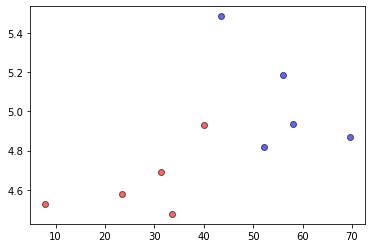

In [5]:
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.show()

In [6]:
X_train

array([[69.57101627,  4.87015914],
       [52.23187364,  4.81975457],
       [43.47558278,  5.48553801],
       [56.11775925,  5.18644854],
       [58.08829786,  4.93713646],
       [23.43700428,  4.57827808],
       [33.51845669,  4.47721934],
       [31.41104863,  4.69110858],
       [ 7.91675634,  4.53022944],
       [40.09061935,  4.92936799]])

In [7]:
X_train.shape

(10, 2)

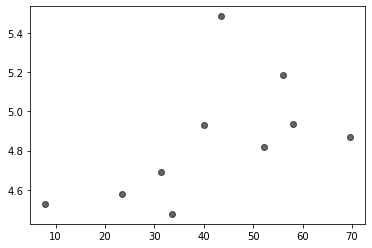

In [8]:
plot_scatter(X_train)
plt.show()

In [9]:
print('mean:', np.mean(X_train, axis=0))
print('std:', np.std(X_train, axis=0))

mean: [41.58584151  4.85052402]
std: [17.37072023  0.2954005 ]


# K-means algorithm
![](images/kmeans.png)
```    
    init : {‘k-means++’, ‘random’ or an ndarray} Method for initialization, defaults to ‘k-means++’:
    ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    ‘random’: choose k observations (rows) at random from data for the initial centroids.
    If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
```    


In [10]:
kmeans = KMeans(init='random', n_clusters=2).fit(X_train)
kmeans

KMeans(init='random', n_clusters=2)

In [11]:
kmeans.predict([[80, 0], [100, 3]])

array([1, 1])

In [12]:
kmeans.predict([[28, 5]])

array([0])

In [13]:
kmeans.predict(X_train)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [14]:
kmeans.cluster_centers_

array([[27.27477706,  4.64124069],
       [55.89690596,  5.05980734]])

In [15]:
X_train

array([[69.57101627,  4.87015914],
       [52.23187364,  4.81975457],
       [43.47558278,  5.48553801],
       [56.11775925,  5.18644854],
       [58.08829786,  4.93713646],
       [23.43700428,  4.57827808],
       [33.51845669,  4.47721934],
       [31.41104863,  4.69110858],
       [ 7.91675634,  4.53022944],
       [40.09061935,  4.92936799]])

In [16]:
kmeans.labels_

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

##    Plot Scatter
    1. 將資料點繪製成scatter圖. 請依據K-means分群後的結果來給予不同cluster有不同的顏色
       (cluster數非固定值)
    2. 將K-means中心點資料點也繪製上去並有較大圖樣

In [26]:
kmeans.predict(X_train)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

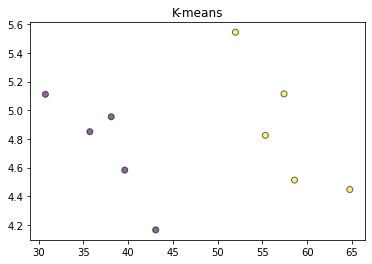

In [27]:
plot_scatter(X_train, kmeans.predict(X_train))
plt.title("K-means")
plt.show()

In [28]:
kmeans.cluster_centers_

array([[37.44604605,  4.73291064],
       [57.61769065,  4.88882749]])

In [29]:
kmeans.cluster_centers_[:,1]

array([4.73291064, 4.88882749])

In [30]:
kmeans.predict(X_train)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

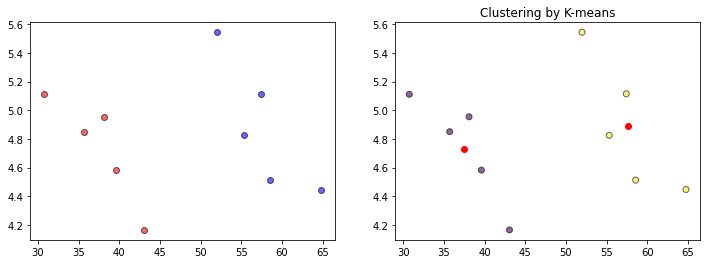

In [31]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_scatter(C1, color='b')
plot_scatter(C2, color='r')
plt.subplot(122)
plot_scatter(X_train, color=kmeans.predict(X_train))
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1], c='red')
plt.title("Clustering by K-means")
plt.show()

## Agglomerative algorithm
    1) linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
    
    2.) affinity : string or callable, default: “euclidean”
    Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

In [32]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [33]:
acv = AgglomerativeClustering(n_clusters=2,
                              linkage='single').fit(X_train)
acv

AgglomerativeClustering(linkage='single')

In [34]:
cluster_labels = acv.fit_predict(X_train)
cluster_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

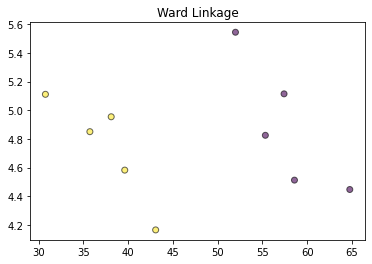

In [35]:
plot_scatter(X_train, acv.fit_predict(X_train))
plt.title("Ward Linkage")
plt.show()

In [36]:
X_train

array([[55.33049225,  4.825319  ],
       [57.4194116 ,  5.11457567],
       [64.76711529,  4.44734163],
       [51.98824393,  5.54415375],
       [58.58319018,  4.51274738],
       [30.7430083 ,  5.11123432],
       [43.06612357,  4.16549276],
       [38.09655811,  4.95456639],
       [35.71408908,  4.85068769],
       [39.61045119,  4.58257206]])

## distance matrix

In [17]:
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_circles, make_blobs
D = np.round(pairwise_distances(X_train), 1) 
D

array([[ 0. , 17.3, 26.1, 13.5, 11.5, 46.1, 36.1, 38.2, 61.7, 29.5],
       [17.3,  0. ,  8.8,  3.9,  5.9, 28.8, 18.7, 20.8, 44.3, 12.1],
       [26.1,  8.8,  0. , 12.6, 14.6, 20.1, 10. , 12.1, 35.6,  3.4],
       [13.5,  3.9, 12.6,  0. ,  2. , 32.7, 22.6, 24.7, 48.2, 16. ],
       [11.5,  5.9, 14.6,  2. ,  0. , 34.7, 24.6, 26.7, 50.2, 18. ],
       [46.1, 28.8, 20.1, 32.7, 34.7,  0. , 10.1,  8. , 15.5, 16.7],
       [36.1, 18.7, 10. , 22.6, 24.6, 10.1,  0. ,  2.1, 25.6,  6.6],
       [38.2, 20.8, 12.1, 24.7, 26.7,  8. ,  2.1,  0. , 23.5,  8.7],
       [61.7, 44.3, 35.6, 48.2, 50.2, 15.5, 25.6, 23.5,  0. , 32.2],
       [29.5, 12.1,  3.4, 16. , 18. , 16.7,  6.6,  8.7, 32.2,  0. ]])

In [18]:
D.shape[0]

10

In [19]:
def min_dist(D):
    minimum = 10000  
    min_x = 0
    min_y = 0
    for i in range(D.shape[0]):
        for j in range(i):           
            if D[i][j] < minimum:         
                minimum = D[i][j]
                min_x = i
                min_y = j
                #print(i,j,D[i][j])
    return (min_x, min_y), minimum

In [20]:
min_dist(D)

((4, 3), 2.0)

## plot dendrogram (樹狀圖)

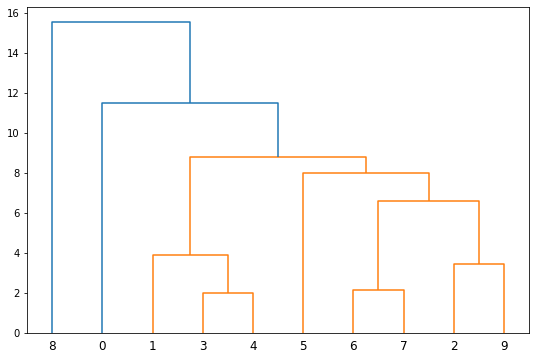

In [21]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))

def plot_dendrogram(x, method='ward'):
    Z = linkage(x, method)
    dendrogram(Z)

plot_dendrogram(X_train,'single')
plt.show()

## Comparing different hierarchical linkage methods

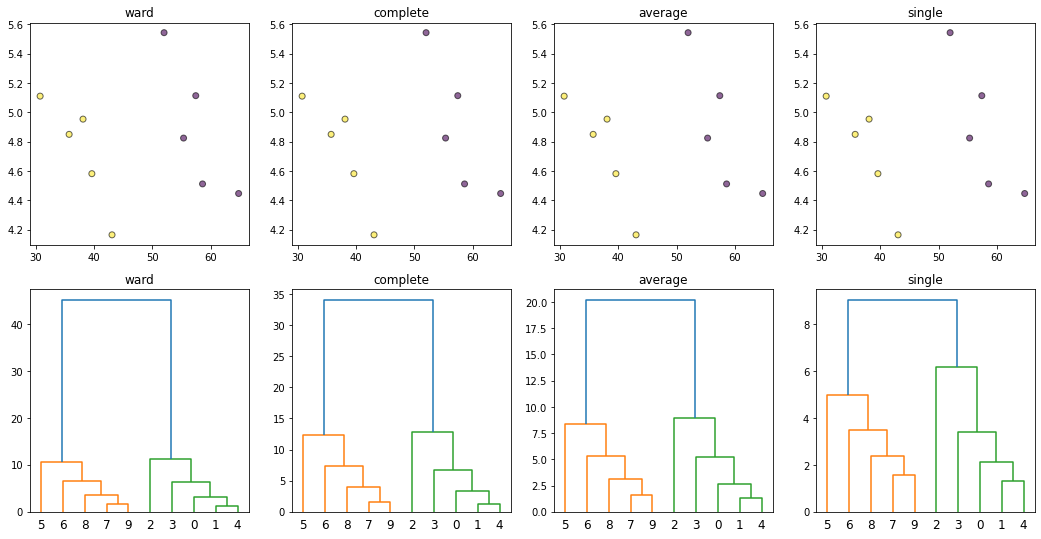

In [42]:
def compare_linkage(X):
    
    plt.figure(figsize=(18, 9))
    linktype=['ward', 'complete', 'average', 'single']

    for i, link in enumerate(linktype):
        model = AgglomerativeClustering(n_clusters=2,
                                        linkage=link).fit(X)
        cluster_labels = model.fit_predict(X)   
        #plot scatter 
        plt.subplot(2, 4, i+1)        
        plot_scatter(X, cluster_labels)
        plt.title(link)
        #plot dendrogram
        plt.subplot(2, 4, i+5)        
        plot_dendrogram(X, link)
        plt.title(link)   

    plt.show()     
    
compare_linkage(X_train)

## Apply K-means with re-scaled data
### Feature Re-scale 

In [43]:
X_train

array([[55.33049225,  4.825319  ],
       [57.4194116 ,  5.11457567],
       [64.76711529,  4.44734163],
       [51.98824393,  5.54415375],
       [58.58319018,  4.51274738],
       [30.7430083 ,  5.11123432],
       [43.06612357,  4.16549276],
       [38.09655811,  4.95456639],
       [35.71408908,  4.85068769],
       [39.61045119,  4.58257206]])

[47.53186835  4.81086907]
[10.91269589  0.37845284]


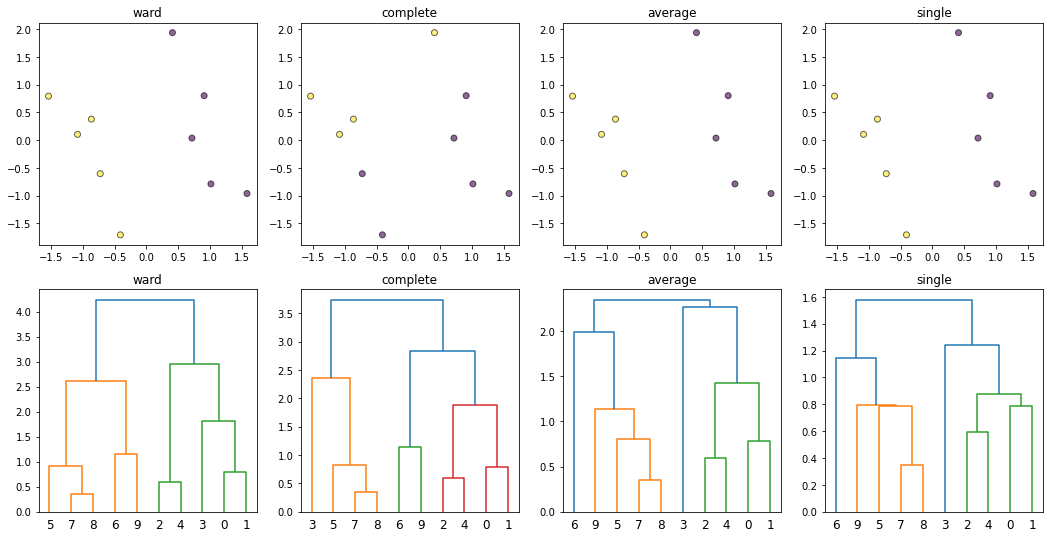

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  
#Compute the statistics to be used for later scaling.

print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

#transform: (x-u)/std.
X_train_std = sc.transform(X_train)

np.round(np.mean(X_train_std,axis=0),2)

compare_linkage(X_train_std)

In [45]:
from sklearn.datasets import make_circles
#make a synthetic dataset (circle) 
#array of shape [n_samples, 2]
X, y = make_circles(n_samples=100, shuffle=True,
                    factor=0.5, random_state=0, noise=0.05) 

In [48]:
print(X[:10])
print(y[:10])

[[-0.97084503 -0.12673179]
 [-0.01989117 -0.45880462]
 [ 0.95036645  0.21475102]
 [ 0.3868271   0.25685525]
 [-0.53375109 -0.00663921]
 [ 0.34970205 -0.2956982 ]
 [-0.41722927  0.81854348]
 [-0.47625865  0.08139568]
 [ 0.42783229  0.26529816]
 [ 0.36259195 -0.27483444]]
[0 1 0 1 1 1 0 1 1 1]


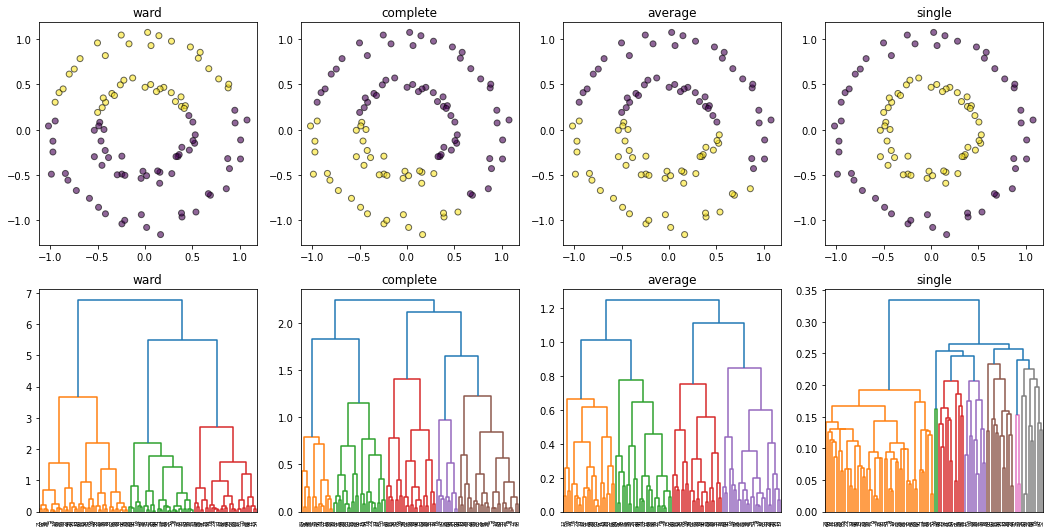

In [47]:
compare_linkage(X)